In [ ]:
from aimon import ProjectChange
from aimon import ChangeEventCollection
import os 
# Set current directory to the location of the notebook (works even if __file__ is not defined)
try:
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    current_dir = os.getcwd()

os.chdir(current_dir)


In [ ]:
# Path to the unlabelled change events test file
labelled_file = "../test_data/change_events_labelled.json"
unlabelled_file = "../test_data/change_events_unlabelled.json"
outfolder = "../test_data/out"

test_size = 0.2
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True]
}
ignore_labels=["undefined"]
random_state = 3

# Predefined paths for output
predicted_file = os.path.join(outfolder, "change_events_labelled_using_random_forest.json")
model_file = os.path.join(outfolder, "best_model.joblib")
os.makedirs(outfolder, exist_ok=True)

Best params: {'bootstrap': True, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Train  F1: 0.9907858772167454
Test   F1: 0.8020458003042678

Classification Report:
                           precision    recall  f1-score   support

gravitationalMassMovement       0.84      0.82      0.83       366
               vegetation       0.76      0.79      0.78       272

                 accuracy                           0.81       638
                macro avg       0.80      0.80      0.80       638
             weighted avg       0.81      0.81      0.81       638



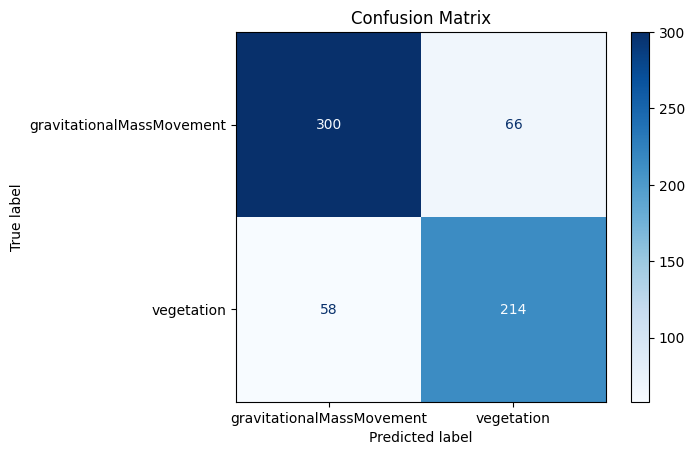

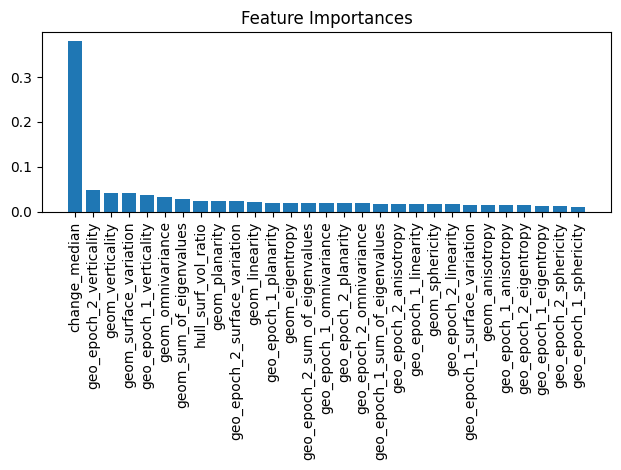

Jaccard Score:                  0.670
Accuracy Score:                 0.806
F1 Score (macro):               0.802
Matthews Corr. Coef.:           0.604
Cohen's Kappa:                  0.604


In [ ]:
coll = ChangeEventCollection.load_from_file(labelled_file)
coll.train_random_forest(
    ignore_labels=ignore_labels,
    param_grid=param_grid,
    test_size =test_size,
    random_state=random_state
)

In [8]:
unlabelled_coll = ChangeEventCollection.load_from_file(unlabelled_file)
unlabelled_coll.model = coll.model
unlabelled_coll.apply_random_forest()
unlabelled_coll.save_to_file(predicted_file)

# Save to .geojson for visual inspection

In [9]:
change_prj = ProjectChange(change_event_file = predicted_file,
                           project_name = os.path.basename(predicted_file)[:-4],
                           projected_image_folder = "",
                           projected_events_folder = outfolder,
                           epsg=31254)
change_prj.project_change()

Missing some information, cannot find 
Missing some information, cannot project change into image


### Optional: Save and load the model

In [11]:
coll.save_model(model_file)
coll.load_model(model_file)

Model saved to ../test_data/out\best_model.joblib
Model loaded from ../test_data/out\best_model.joblib
